# Period estimation statistics

In [1]:
import requests
import time
import io
import os

import numpy as np
import pandas as pd

import rocks

from figure_mask import compute_mask, print_statistics

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")

### Combination BFT & SSOFT

In [2]:
cols = [
    'sso_number', 'sso_name', 'sso_class',
    'spins.1.period.value', 'spins.2.period.value',
    'spins.1.period.error.min',
    'spins.1.period.error.max',
    'spins.1.period_type',
    'spins.1.period_flag',
    'spins.1.technique'
]

# Read BFT with rocks
bft = rocks.load_bft(columns=cols)

In [3]:
# bft[bft["spins.1.period.value"] == bft["spins.1.period.value"]].groupby("spins.1.period_flag").count()

In [4]:
print("{:,} periods available in the BFT".format(len(bft[bft["spins.1.period.value"] == bft["spins.1.period.value"]])))

47,064 periods available in the BFT


In [5]:
# You need SSOFT version 2024.09
# see fink_spins/generate_data.py
data_fink = "../../"
ssoft = pd.read_parquet(os.path.join(data_fink, "data", "ztf", "sso_ZTF.parquet"))

In [6]:
flavor = "SHG1G2"

## Comparison to literature

In [14]:
# Keep only known periods 1 in the BFT
data = ssoft.merge(bft, left_on="name", right_on="sso_name", how="left")
data = data[data["spins.1.period.value"] == data["spins.1.period.value"]]

# sort by number of observations
data = data.sort_values("n_obs", ascending=False)
# data = data.sort_values(f'{flavor}_rms', ascending=False)

col_display = ["sso_number", "sso_name", "n_obs", "sso_class", "spins.1.period.value", "spins.2.period.value", f"{flavor}_synodic_period", 'spins.1.technique']
col_display = ["sso_number", "sso_name", "n_obs", "sso_class", "spins.1.period.value", f"{flavor}_synodic_period", 'spins.1.technique', f'{flavor}_rms']

if flavor == 'SHG1G2':
    col_display.append(f"{flavor}_R")

cond = data.sso_class.str.contains("NEA")

data.loc[cond,col_display].head(50)

,sso_number,sso_name,n_obs,sso_class,spins.1.period.value,SHG1G2_synodic_period,spins.1.technique,SHG1G2_rms,SHG1G2_R
81487,105140,2000 NL10,363.0,NEA>Aten,6.925847,3.463016,LC,0.198119,0.785898
47581,4450,Pan,360.0,NEA>Apollo,56.480000,7.399759,LC,0.047008,0.843853
87821,1866,Sisyphus,320.0,NEA>Apollo,2.397582,23.869297,A-M,0.059619,0.700004
15937,85804,1998 WQ5,303.0,NEA>Amor,3.008900,24.071049,A-M,0.064473,0.552676
92545,3200,Phaethon,284.0,NEA>Apollo,3.603956,1.566443,SAGE,0.081629,0.885639
77601,2212,Hephaistos,279.0,NEA>Apollo,48.000000,23.937159,LC,0.081436,0.326115
4160,12711,Tukmit,275.0,NEA>Apollo>PHA,3.484900,1.742237,LC,0.270767,0.785407
134191,36284,2000 DM8,272.0,NEA>Apollo,3.844667,1.919957,LC,0.116026,0.882860
33472,1627,Ivar,270.0,NEA>Amor,4.795169,2.397841,Radar,0.239440,0.407480
85598,5143,Heracles,261.0,NEA>Apollo,2.707587,23.934116,LC,0.135882,0.300000


In [8]:
print("{:,} periods available in the BFT x Fink".format(len(data[data["spins.1.period.value"] == data["spins.1.period.value"]])))

33,886 periods available in the BFT x Fink


### Mask

It is not obvious yet what are the criteria for good period estimation, so let's stick with masks defined for sHG1G2

In [9]:
mask_SHG1G2_union = compute_mask(data, model='SHG1G2', kind='union')
mask_HG1G2_union = compute_mask(data, model='HG1G2', kind='union')
mask_HG_union = compute_mask(data, model='HG', kind='union')

mask_SHG1G2_inter = compute_mask(data, model='SHG1G2', kind='inter')
mask_HG1G2_inter = compute_mask(data, model='HG1G2', kind='inter')
mask_HG_inter = compute_mask(data, model='HG', kind='inter')

maskFINK_inter = compute_mask(data, R_min=0.305, model='FINK', kind='inter')
maskFINK_union = compute_mask(data, R_min=0.305, model='FINK', kind='union')

for model in ['HG', 'HG1G2', 'SHG1G2', 'FINK']:
    print_statistics(data, model)
    print()

  All data       :  33886  (100.00%)
  Mask HG (g∩r) :  33359  ( 98.44%)
  Mask HG (gUr) :  33361  ( 98.45%)

  All data       :  33886  (100.00%)
  Mask HG1G2 (g∩r) :  13023  ( 38.43%)
  Mask HG1G2 (gUr) :  24008  ( 70.85%)

  All data       :  33886  (100.00%)
  Mask SHG1G2 (g∩r) :  18207  ( 53.73%)
  Mask SHG1G2 (gUr) :  27523  ( 81.22%)

  All data       :  33886  (100.00%)
  Mask FINK (g∩r) :  17891  ( 52.80%)
  Mask FINK (gUr) :  26985  ( 79.63%)



In [10]:
# We choose mask union
mask = maskFINK_union

In [11]:
print("{:,} periods available in the MASK(BFT x Fink)".format(
    len(data[data["spins.1.period.value"] == data["spins.1.period.value"]][mask])))

22,644 periods available in the MASK(BFT x Fink)


### Period distribution

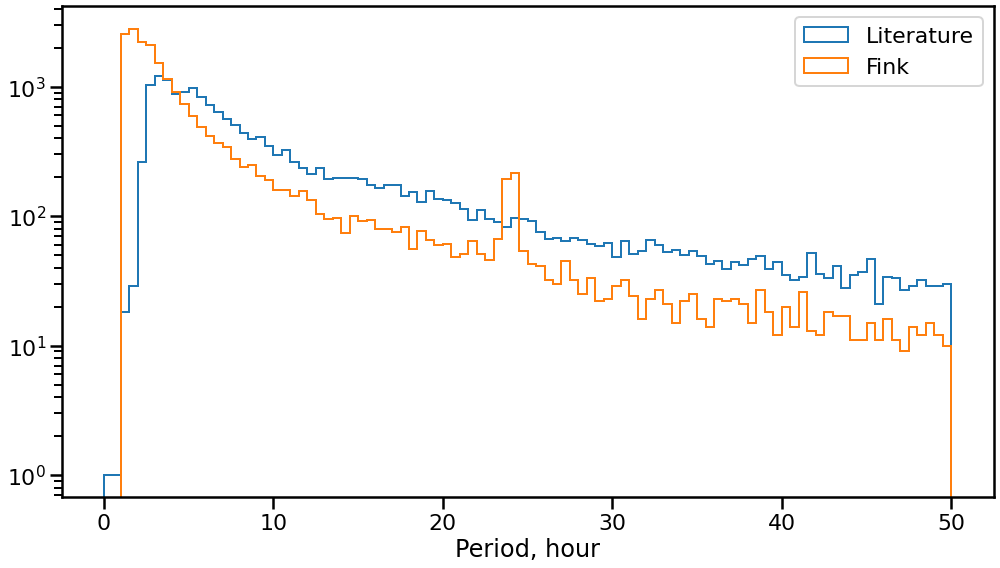

In [12]:
fig = plt.figure(figsize=(14, 8))

xmax = 50

_, bins, _ = plt.hist(
    data[mask]["spins.1.period.value"], 
    density=False, 
    bins=100, 
    range=(0, xmax), 
    histtype="step",
    label="Literature"
)
plt.hist(
    data[mask][f"{flavor}_synodic_period"], 
    density=False, 
    bins=bins, 
    range=(0, xmax), 
    histtype="step",
    label="Fink"
)
plt.legend()
plt.yscale("log")
plt.xlabel("Period, hour")
plt.tight_layout()

General trend is OK. Fink has more small periods than in the literature (few hours). A large bump at `P=24h` which is not-so-suprising given the general cadence of ZTF...

## 24 hours bump

This seems clearly an artifact from the cadence. Let's try to correlate this bump with other parameters:

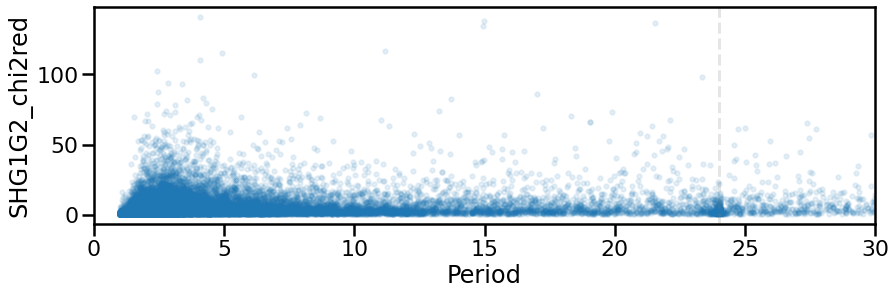

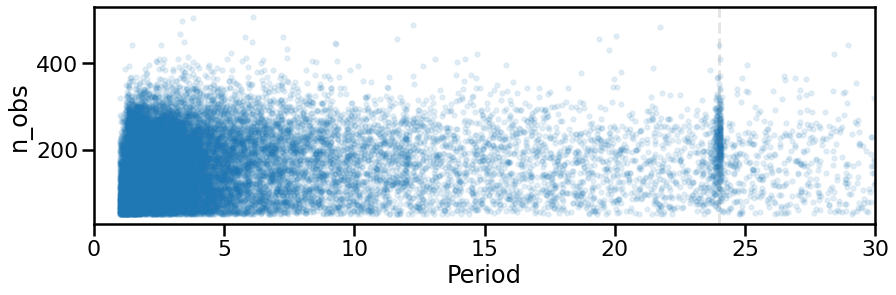

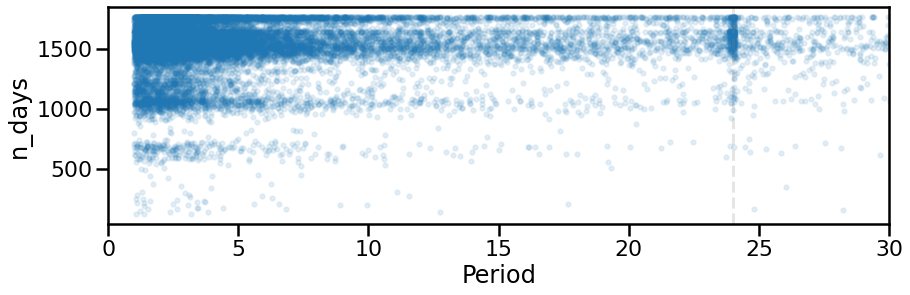

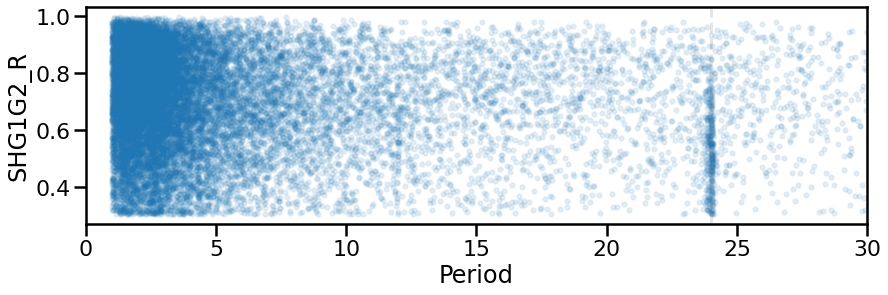

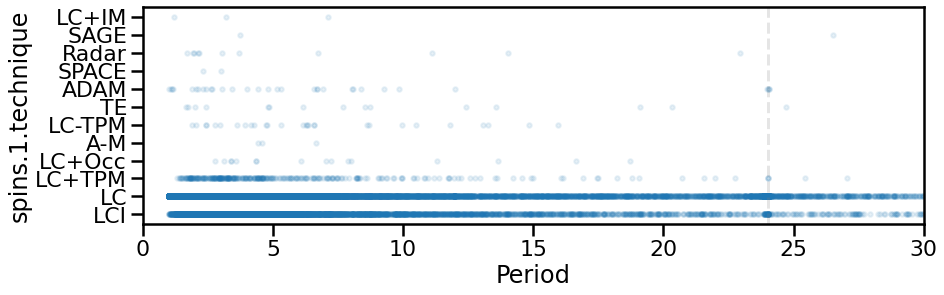

In [13]:
vals = ["SHG1G2_chi2red", "n_obs", "n_days", "SHG1G2_R", "spins.1.technique"]

for val in vals:
    fig = plt.figure(figsize=(14, 4))

    plt.scatter(data[mask]["SHG1G2_synodic_period"], data[mask][val], alpha=0.1, s=20)
    plt.axvline(24, ls='--', color='grey', alpha=0.2)
    plt.ylabel(val)
    plt.xlabel("Period")
    plt.xlim(0, 30)
    plt.show()

Nothing really correlated. We should probe the lightcurve morphology (number of opposition, real cadence, ...)

## Scatter plot

Let's compare directly periods:

In [14]:
def alias_func(x, i, j, p_feat):
    """ Return aliases relation

    x: float
        Fink period
    i: int
        Strictly positive integer. Mode.
    j: int
        Alias
    p_feat: float
        Frequency of a feature
    """
    return (i + 1) * p_feat * x / np.abs(p_feat - j *x)

/tmp/ipykernel_678136/1958375727.py:13: RuntimeWarning: divide by zero encountered in divide
  return (i + 1) * p_feat * x / np.abs(p_feat - j *x)


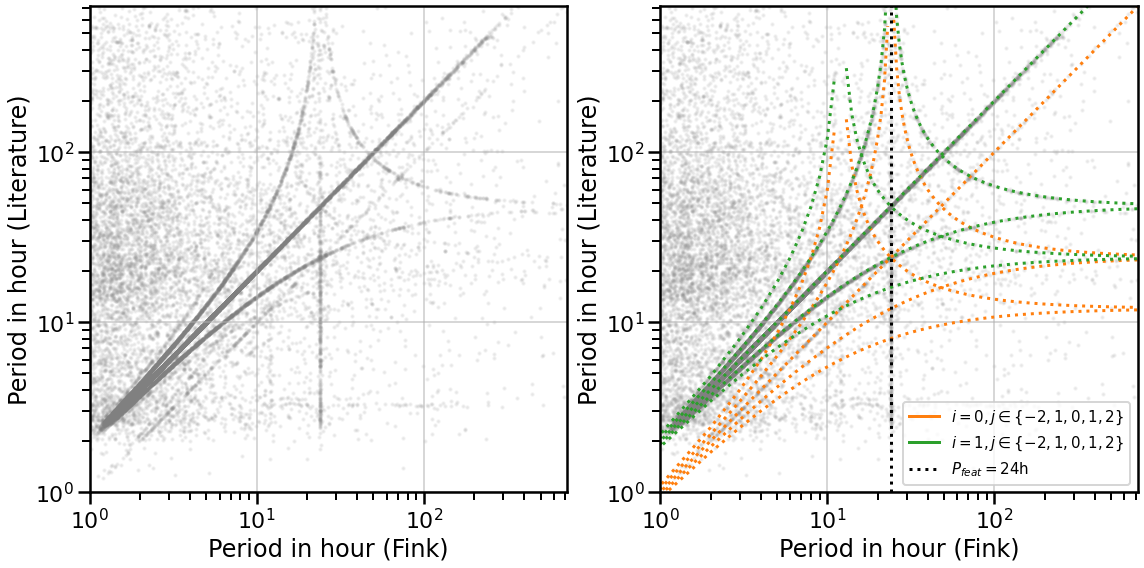

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

maxval = 30*24

for ax in axes:
    ax.scatter(
        data[mask][f"{flavor}_synodic_period"], 
        data[mask]["spins.1.period.value"], 
        marker='.', alpha=0.1, s=20, color='grey'
    )
    # plt.colorbar()
    ax.grid(alpha=0.5)
    ax.set_xlim(1, maxval)
    ax.set_ylim(1, maxval)
    ax.set_xlabel("Period in hour (Fink)")
    ax.set_ylabel("Period in hour (Literature)")
    ax.set_xscale("log")
    ax.set_yscale("log")

xr = np.array(range(maxval))

axes[1].plot(0.1, 0.1, color="C1", label=r"$i=0, j \in \{-2, 1, 0, 1, 2 \}$") # For the legend
axes[1].plot(0.1, 0.1, color="C2", label=r"$i=1, j \in \{-2, 1, 0, 1, 2 \}$") # For the legend

for i in [0, 1]:
    for j in range(-2, 3):
        axes[1].plot(xr, alias_func(xr, i, j, p_feat=24), color='C{}'.format(i+1), ls=':', label="")
axes[1].axvline(24, ls=':', color='black', label=r"$P_{feat} = 24$h")

axes[1].legend(prop={'size': 15})
plt.tight_layout()

The left plot shows strong features that are actually related to aliases of the fundamental and harmonics of the true period. They are easily parametrized using:

$$
\dfrac{1}{P_{Fink}} = \Big | \dfrac{i + 1}{P_{true}} + \dfrac{j}{P_{feat}} \Big |
$$

or

$$
P_{i, j} = \dfrac{(i + 1)\times P_{feat} \times P_{Fink}}{|P_{feat} - j \times P_{Fink}|}
$$

where $P_{feat}$ is the period of an instrumental effect rooted in the structure of the window function of the signal (e.g. the cadence), $P_{Fink}$ is the best fit period from Fink data, $i$ is a positive integer related to harmonics, and $j$ is an integer related to aliases of the fundamental ($i=0$) and its harmonics ($i>0$). In the plot above the case for $P_{feat} = 24h$, $i \in \{0, 1\}$ and $j \in \{-2, 1, 0, 1, 2\}$ is shown. Some interesting cases clearly seen on the plot:
- $i=0, j=0$: fundamental
- $i=1, j=0$: first harmonics
- $i=1, j=\pm 1$: aliases of the first harmonics

### More reliable flags

In [16]:
# Choosing only reliable flags
mask_pure = mask * data["spins.1.period_flag"].isin(["U=1", "U=2", "U=3", "U=1+", "U=2+", "U=3+", "U=1-", "U=2-", "U=3-"])

/tmp/ipykernel_678136/1958375727.py:13: RuntimeWarning: divide by zero encountered in divide
  return (i + 1) * p_feat * x / np.abs(p_feat - j *x)


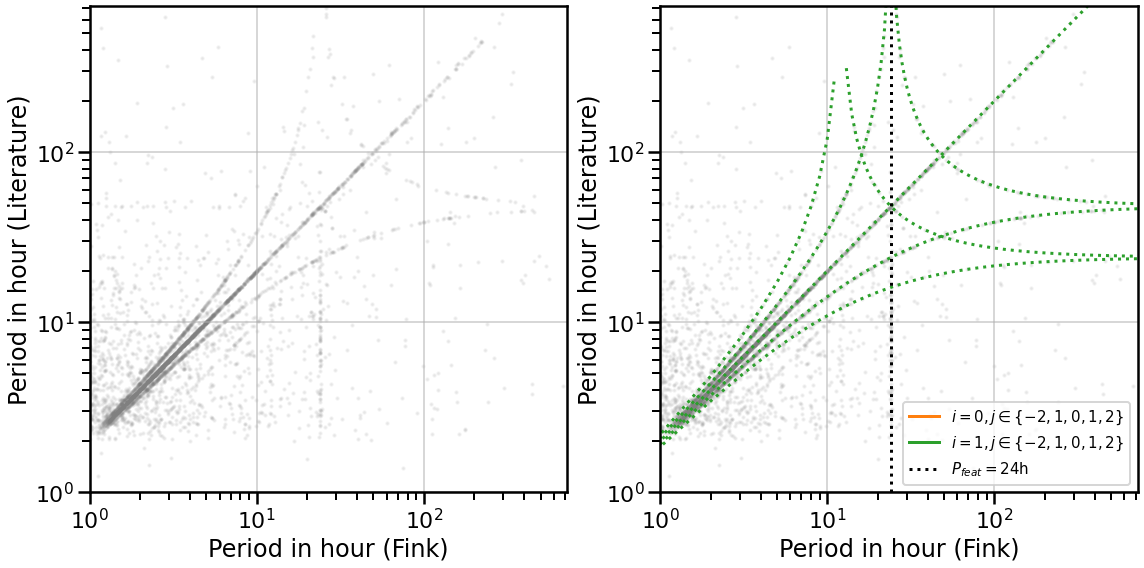

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

maxval = 30*24

for ax in axes:
    ax.scatter(
        data[mask_pure][f"{flavor}_synodic_period"], 
        data[mask_pure]["spins.1.period.value"], 
        marker='.', alpha=0.1, s=20, color='grey'
    )
    # plt.colorbar()
    ax.grid(alpha=0.5)
    ax.set_xlim(1, maxval)
    ax.set_ylim(1, maxval)
    ax.set_xlabel("Period in hour (Fink)")
    ax.set_ylabel("Period in hour (Literature)")
    ax.set_xscale("log")
    ax.set_yscale("log")

xr = np.array(range(maxval))

axes[1].plot(0.1, 0.1, color="C1", label=r"$i=0, j \in \{-2, 1, 0, 1, 2 \}$") # For the legend
axes[1].plot(0.1, 0.1, color="C2", label=r"$i=1, j \in \{-2, 1, 0, 1, 2 \}$") # For the legend

for i in [1]:
    for j in range(-2, 3):
        axes[1].plot(xr, alias_func(xr, i, j, p_feat=24), color='C{}'.format(i+1), ls=':', label="")
axes[1].axvline(24, ls=':', color='black', label=r"$P_{feat} = 24$h")

axes[1].legend(prop={'size': 15})
plt.tight_layout()

## Aliases vs mismatches

Let's count how many Fink period are just harmonics or aliases of the literature periods, and how many are mismatching:

In [18]:
from collections import Counter

def is_alias(obs, true, p_feat):
    for i in [0, 1]:
        for j in range(-2, 3):
            tmp = alias_func(obs, i, j, p_feat)
            if np.isclose(tmp, true, 1e-1):
                return "{},{}".format(i, j)
    return ""

def is_feature(obs, p_feat):
    if np.isclose(obs, p_feat, 1e-1):
        return True
    return False

In [19]:
tmp = [is_alias(obs, true, p_feat=24) for obs, true in zip(data[mask][f"{flavor}_synodic_period"], data[mask]["spins.1.period.value"])]
d = Counter(tmp)

In [20]:
matches = np.sum([d[i] for i in d if i != ""])
nfeat = np.sum([is_feature(f, 24.) for f in data[mask][f"{flavor}_synodic_period"]])

msg = "{:.2f}% are matches (true, harmonics or aliases), {:.2f}% are cadence frequency (24h period), and {:.2f}% have no match.".format(
    matches/len(tmp)*100, nfeat/len(tmp)*100, 100 - (matches + nfeat)/len(tmp)*100)
print(msg)

72.92% are matches (true, harmonics or aliases), 3.46% are cadence frequency (24h period), and 23.62% have no match.


In [21]:
true = np.sum([d[i] for i in d if i == "0,0"])
true_alias = np.sum([d[i] for i in d if i in ["0,-2", "0,-1", "0,1", "0,2"]])
first_harmonics = np.sum([d[i] for i in d if i == "1,0"])
first_harmonics_alias = np.sum([d[i] for i in d if i in ["1,-2", "1,-1", "1,1", "1,2"]])

In [22]:
msg = """
{} are exact matches (0, 0)
{} are aliases of the true frequency (0, j)
{} are the first harmonics (1, 0)
{} are aliases of the first harmonics (1, j)
{} are 24h period
""".format(true, true_alias, first_harmonics, first_harmonics_alias, nfeat)
print(msg)


578 are exact matches (0, 0)
2217 are aliases of the true frequency (0, j)
6633 are the first harmonics (1, 0)
7084 are aliases of the first harmonics (1, j)
784 are 24h period



So in the end we have a strong contamination from the daily cadence of the survey. But on overall, that's 72% of the frequencies that are related to the values reported in the literature. This is a first good results as, assuming the literature is correct, we expect about the same amount of correctness in the whole Fink sample.

Note that in this first trial, the best fit period from Fink was selected as the highest peak in the periodogram. This is known to produce these artifacts. We will now move to a more robust method.